In [1]:
import openai

# openai.base_url = 'http://222.29.156.145:8000/v1/'
# openai.api_key = 'key'
# model_name = "Qwen/Qwen2.5-32B-Instruct"
openai.base_url = 'https://api.deepseek.com'
openai.api_key = 'sk-54964e5c3b8c4998a74f7d3e35b618ac'
model_name = 'deepseek-chat'

resp = openai.chat.completions.create(
    model=model_name,
    messages=[
        {
            'role': 'user',
            'content': "如何用python优雅地把一个二维列表合并为一整个集合？"
        },
    ]
)
print(resp.choices[0].message.content)

# 优雅地将二维列表合并为一个集合（Python）

在Python中，有几种优雅的方式可以将二维列表（列表的列表）合并为一个集合。以下是几种常见的方法：

## 方法1：使用嵌套列表推导式

```python
two_dim_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
merged_set = {item for sublist in two_dim_list for item in sublist}
```

## 方法2：使用itertools.chain

```python
from itertools import chain

two_dim_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
merged_set = set(chain.from_iterable(two_dim_list))
```

## 方法3：使用sum函数（适用于小型列表）

```python
two_dim_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
merged_set = set(sum(two_dim_list, []))
```

## 方法4：使用reduce函数

```python
from functools import reduce
import operator

two_dim_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
merged_set = set(reduce(operator.concat, two_dim_list))
```

## 性能比较

对于大型二维列表：
- `itertools.chain` 方法通常性能最好
- 列表推导式方法也很高效
- `sum` 方法性能较差，不推荐用于大型列表

## 注意事项

1. 集合会自动去重，如果需要保留所有元素（包括重复项），应该使用列表而不是集合
2. 如果二维列表中包含不可哈希的元素（如列表、字典等），则不能转换为集合

选择哪种方法取决于你的具体需求和个人偏好，但前两种方法通常被认为是最优雅和高效的解决方案。


In [ ]:
import json
from utils.parse_expr import *
data = json.load(open('data/processed_spice_data/dev_full.json', 'r'))
len(data)
# parser = ExprParser()


# for example in data:
#     example['new_sparql'] = parser.lisp_to_sparql(example['s_expression'])
# json.dump(data, open('data/processed_spice_data/new_train_full.json', 'w'), indent=4)

In [ ]:
import json
from utils.parse_expr import lisp_to_sparql
data = json.load(open('data/processed_spice_data/train_full.json', 'r'))

for example in data:
    example['new_sparql'] = lisp_to_sparql(example['s_expression'])
json.dump(data, open('data/processed_spice_data/new_train_full.json', 'w'), indent=4)

In [ ]:
data = json.load(open('data/processed_spice_data/new_train_full.json', 'r'))

In [ ]:
from pymantic import sparql

server = sparql.SPARQLServer('http://localhost:9999/blazegraph/sparql')

query = 'SELECT DISTINCT ?x0 WHERE { { ?x1 ?x0 wd:Q486972 . } UNION { wd:Q486972 ?x0 ?x1 . } }'
# query = "SELECT ?sport (COUNT( ?tournament) AS ?count) WHERE { ?tournament wdt:P641 ?sport . ?tournament wdt:P31 wd:Q500834 . } GROUP BY ?sport ORDER BY DESC( ?count) LIMIT 1"
query = 'prefix wd: <http://www.wikidata.org/entity/> prefix wdt: <http://www.wikidata.org/prop/direct/> ' + query
results = server.query(query)
print(results)
# print([binding[var]['value'].split('/')[-1] for binding in result['results']['bindings'] for var in binding])
# types = [binding[var]['value'].split('/')[-1] for binding in result['results']['bindings'] for var in binding]

{'head': {'vars': ['x0']}, 'results': {'bindings': [{'x0': {'type': 'uri', 'value': 'http://www.wikidata.org/prop/direct/P31'}}, {'x0': {'type': 'uri', 'value': 'http://www.wikidata.org/prop/direct/P360'}}, {'x0': {'type': 'uri', 'value': 'http://www.wikidata.org/prop/direct/P1709'}}, {'x0': {'type': 'uri', 'value': 'http://www.wikidata.org/prop/direct/P18'}}, {'x0': {'type': 'uri', 'value': 'http://www.wikidata.org/prop/direct/P227'}}, {'x0': {'type': 'uri', 'value': 'http://www.wikidata.org/prop/direct/P279'}}, {'x0': {'type': 'uri', 'value': 'http://www.wikidata.org/prop/direct/P373'}}, {'x0': {'type': 'uri', 'value': 'http://www.wikidata.org/prop/direct/P646'}}, {'x0': {'type': 'uri', 'value': 'http://www.wikidata.org/prop/direct/P910'}}, {'x0': {'type': 'uri', 'value': 'http://www.wikidata.org/prop/direct/P1051'}}, {'x0': {'type': 'uri', 'value': 'http://www.wikidata.org/prop/direct/P1424'}}, {'x0': {'type': 'uri', 'value': 'http://www.wikidata.org/prop/direct/P2633'}}, {'x0': {'t

{'x0': ['P31',
  'P360',
  'P1709',
  'P18',
  'P227',
  'P279',
  'P373',
  'P646',
  'P910',
  'P1051',
  'P1424',
  'P2633',
  'P1963',
  'rdf-schema#label',
  'P180',
  'P971',
  'P361',
  'P1074',
  'P1423',
  'P301',
  'P366']}

In [ ]:
prompt = r"""
        接下来请将问题转化为逻辑形式。
        这里的逻辑形式由以下的函数构成，其中大部分函数返回符合其条件的
        (JOIN predicate object), 返回所有subject, 使subject, predicate, object是知识图谱中的三元组。
        (JOIN (R predicate) subject), 返回所有object, 使subject, predicate, object是知识图谱中的三元组, (R predicate)在这里表示关系的逆转。
        (AND query1 query2 ...), 返回若干查询结果的交集。
        (OR query1 query2 ...), 返回若干集合的并集。
        (DIFF query1 query2), 返回两个集合的差集query1-query2。
        (VALUES value1 value2 ...), 返回由v1,v2等值组成的集合。
        (DISTINCT query), 返回去重后的集合。
        (COUNT query), 返回集合的元素数目。
        (LT query value), 从query筛选出小于value的元素，作为新的集合返回. 类似地，LE, EQ, GE, GT分别表示小于等于，等于，大于等于，大于。
        (GROUP_COUNT query), 分组计数，返回python中的字典，键值分别为集合中的元素与其在集合中的数目。
        (GROUP_SUM group_count1 group_count2), 合并两个集合分组计数的结果，返回字典，键值分别为元素与其在两个集合中的总数目。
        (ARGMIN dictionary), 返回字典中对应值最小的键. 类似地，ARGMAX对应值最大的键。
        (ASK (s1 p1 o1) (s2 p2 o2) ...), 对若干三元组，判断其是否同时为真。
        """
print(prompt)

In [ ]:
import pickle
def sub_mid_to_fn(string, wikidata_mid_to_fn_dict):
    seg_list = string.split()
    for i in range(len(seg_list)):
        token = seg_list[i].strip(')(')
        if token.startswith('P') or token.startswith('Q'):
            fn = wikidata_mid_to_fn_dict.get(token, "unknown_entity")
            seg_list[i] = seg_list[i].replace(token, fn)
    new_string = ' '.join(seg_list)
    return new_string

with open('data/wikidata_mid_to_fn_dict.pickle', 'rb') as f:
    wikidata_mid_to_fn_dict = pickle.load(f)
len(wikidata_mid_to_fn_dict)

# sub_mid_to_fn('(ASK (Q1776510 child Francesco_of_Saluzzo) (Q1776510 P40 Gian_Gabriele_I_of_Saluzzo) (Q1776510 P40 Michele_Antonio,_Marquess_of_Saluzzo))', wikidata_mid_to_fn_dict)

In [ ]:
import json
data = json.load(open('data/processed_spice_data/dev_1000.json', 'r'))
for example in data:
    if example['s_expression'].startswith('(GROUP_'):
        print(example['question'])
        print(sub_mid_to_fn(example['s_expression'], wikidata_mid_to_fn_dict))
        print(example['sparql_query'])
        print()

In [ ]:
with open('../wikidata.ttl') as f:
    with open('data/wikidata_mid_to_fn.txt', 'w') as out_f:
        # for i in range(1000):
        while True:
            line = f.readline()
            if line.startswith('PREFIX'):
                continue
            seg_list = line.split(' ', 2)
            if seg_list[1] != 'rdfs:label':
                break
            mid = seg_list[0][3:]
            fn = seg_list[2].strip('" .\n')
            print(mid, fn, file=out_f)

#             query = 'SELECT ?fn WHERE { wd:' + mid + ' rdfs:label ?fn }'
#             query = 'prefix wd: <http://www.wikidata.org/entity/> prefix wdt: <http://www.wikidata.org/prop/direct/> ' + query
#             result = server.query(query)
#             fn = [binding[var]['value'].split('/')[-1] for binding in result['results']['bindings'] for var in binding]
#             assert(len(fn) == 1)
#             wikidata_mid_to_fn_dict[mid] = fn[0]
# pickle.dump(wikidata_mid_to_fn_dict, open('data/wikidata_mid_to_fn_dict.pickle', 'wb'))


In [ ]:
def struct_of_exp(exp):
    ans = []
    for token in exp.split():
        if token[0] == '(':
            ans.append(token)
        elif token[-1] == ')':
            n = token.count(')')
            ans.append('x')
            ans.append(token[-n:])
        else:    
            ans.append('x')
    return ans

exp = '(GT (GROUP_SUM (GROUP_COUNT (AND (JOIN (R extends_upon) (JOIN instance_of literary_work)) (JOIN instance_of work_of_art))) (GROUP_COUNT (AND (JOIN (R extends_upon) (JOIN instance_of collectable)) (JOIN instance_of work_of_art)))) (OR (AND (JOIN extends_upon The_World_of_Henry_Orient) (JOIN instance_of literary_work)) (AND (JOIN extends_upon The_World_of_Henry_Orient) (JOIN instance_of collectable))))'

struct_of_exp(exp)

In [ ]:
import pickle
wikidata_mid_to_fn_dict = pickle.load(open('data/wikidata_mid_to_fn_dict.pickle', 'rb'))

from collections import defaultdict
swapped_dict = defaultdict(list)

for key, value in wikidata_mid_to_fn_dict.items():
    if key[0] == 'Q':
        swapped_dict[value].append(key)


In [ ]:
import collections
import os
import json

def isdirect(question):
    if question["question-type"].startswith("Simple Question"):
        return question["question-type"][17:23] == "Direct"
    if "description" in question:
        if "ndirect" in question["description"]:
            return False
        if "ncomplete" in question["description"]:
            return False
    return True

def generate_train_data(file_path):
    data = json.load(open(file_path, 'r'), strict=False)
    processed_data = set()
    for i in range(0, len(data), 2):
        question = data[i]
        answer = data[i + 1]
        qa = {}
        if "sparql" in answer:
            continue

        question_type = f"{question['question-type']} [{question['description']}]" if 'description' in question else question['question-type']
        if question_type == "Comparative Reasoning (Count) (All)":
            print(question)
            print(answer)
        processed_data.add(question_type)
    return processed_data

root = "data/SPICE/train/"
data = set()
for dir in os.listdir(root):
    for file_name in os.listdir(root + dir):
        data |= generate_train_data(root + dir + '/' + file_name)
print(len(data))

In [ ]:
import pickle
import json

dic = pickle.load(open('data/wikidata_mid_to_fn_dict.pickle', 'rb'))

new_dict = {mid: dic[mid] for mid in dic if mid[0] == 'P'}

json.dump(new_dict, open('/home/wangchangcheng/Downloads/knowledge_graph/filtered_property_wikidata4.json', 'w'), indent=4)

In [ ]:
import json
dic = json.load(open('data/wikidata_mid_to_fn.json', 'r'))
for mid, name in dic.items():
    dic[mid] = name.replace(' ', '_')
json.dump(dic, open('data/wikidata_mid_to_fn.json', 'w'))

In [ ]:
# 构建自动机
import pickle
automaton = pickle.load(open('../dynamic_context-main/linking/disamb/automaton.pkl', 'rb'))

In [ ]:
import ahocorasick
from typing import Dict, List, Tuple
import pickle

def replace_with_indices(expression: str, automaton: ahocorasick.Automaton) -> str:
    """
    将文本中的关键词替换为它们在自动机中的索引
    
    Args:
        text: 要处理的文本
        automaton: 构建好的 Aho-Corasick 自动机
        
    Returns:
        替换后的文本，关键词被替换为它们的索引
    """
    # 找出所有匹配的位置和对应的索引
    matches = []
    for end_idx, (mid, fn) in automaton.iter(expression):
        start_idx = end_idx - len(fn) + 1
        matches.append((start_idx, end_idx, mid))
    
    if not matches:
        return expression
    
    # 按照开始位置排序，然后处理重叠匹配
    matches.sort()
    # for start, end, mid in matches:
    #     print(expression[start:end+1], mid)
    
    # 合并重叠的匹配，优先选择更长的匹配
    filtered_matches = []
    prev_start, prev_end, prev_mid = matches[0]
    
    for curr_start, curr_end, curr_mid in matches[1:]:
        if curr_start <= prev_end:  # 有重叠
            # 保留更长的匹配
            if (curr_end - curr_start) > (prev_end - prev_start):
                prev_start, prev_end, prev_mid = curr_start, curr_end, curr_mid
        else:
            filtered_matches.append((prev_start, prev_end, prev_mid))
            prev_start, prev_end, prev_mid = curr_start, curr_end, curr_mid
    
    filtered_matches.append((prev_start, prev_end, prev_mid))
    print(filtered_matches)
    
    # 从后向前替换，避免影响索引
    result = list(expression)
    for start, end, mid in reversed(filtered_matches):
        result[start:end+1] = mid
    
    return ''.join(result)

In [ ]:
import pickle
import json

wikidata_entity_to_fn_dict = pickle.load(open('data/wikidata_entity_to_fn_dict.pickle', 'rb'))
wikidata_relation_to_fn_dict = pickle.load(open('data/wikidata_relation_to_fn_dict.pickle', 'rb'))
wikidata_type_to_fn_dict = pickle.load(open('data/wikidata_type_to_fn_dict.pickle', 'rb'))

json.dump(wikidata_entity_to_fn_dict, open('data/wikidata_entity_to_fn.json', 'w'))
json.dump(wikidata_relation_to_fn_dict, open('data/wikidata_relation_to_fn.json', 'w'))
json.dump(wikidata_type_to_fn_dict, open('data/wikidata_type_to_fn.json', 'w'))

In [ ]:
import json

for split in ['entity', 'relation', 'type']:
    dic = json.load(open(f'data/wikidata_{split}_to_fn.json.redump', 'r'))
    entity_count = json.load(open('data/entity_count.json', 'r'))

    for name, mids in dic.items():
        if len(mids) == 1:
            dic[name] = mids[0]
        else:
            dic[name] = max([(mid, entity_count.get(mid, 0)) for mid in mids], key=lambda x: x[1])[0]

    json.dump(dic, open(f'data/wikidata_{split}_to_mid.json', 'w'), indent=4)

In [ ]:
import pickle
from retriever.semantic_retriever import semantic_search

wikidata_mid_to_fn_dict = pickle.load(open('data/wikidata_mid_to_fn_dict.pickle', 'rb'))

def sub_mid_to_fn(expression, wikidata_mid_to_fn_dict):
    seg_list = expression.split()
    for i in range(len(seg_list)):
        token = seg_list[i].strip(')(')
        if token.startswith('P') or token.startswith('Q'):
            fn = wikidata_mid_to_fn_dict.get(token, "unknown_entity")
            seg_list[i] = seg_list[i].replace(token, fn)
    new_expression = ' '.join(seg_list)
    return new_expression

def sub_fn_to_mid(expression):
    func_list = ['R', 'JOIN', 'AND', 'OR', 'DIFF', 'VALUES', 'DISTINCT', 'COUNT', 'GROUP_COUNT', 'GROUP_SUM', 'LT', 'LE', 'EQ', 'GE', 'GT', 'ARGMIN', 'ARGMAX', 'ALL', 'IS_TRUE']
    seg_list = expression.split()
    for i in range(len(seg_list)):
        token = seg_list[i].strip(')(')
        if token not in func_list and not token.isdigit():
            dis, mid, fn = semantic_search(token)[0]
            seg_list[i] = seg_list[i].replace(token, mid)
    new_expression = ' '.join(seg_list)
    return new_expression

expressions = [
        '(AND (JOIN (R P361) Q35) (JOIN P31 Q2221906))',
        '(OR (AND (JOIN (R P17) Q12060361) (JOIN P31 Q1048835)) (AND (JOIN (R P27) Q5394403) (JOIN P31 Q1048835)))',
        '(COUNT (AND (JOIN (R P17) Q172771) (JOIN P31 Q15617994)))',
        '(COUNT (DISTINCT (OR (AND (JOIN (R P136) Q26208739) (JOIN P31 Q151885)) (AND (JOIN (R P136) Q5323744) (JOIN P31 Q151885)))))',
        '(DISTINCT (AND (JOIN P355 (VALUES Q7163209 Q5908783 Q1273145)) (JOIN P31 Q43229)))',
        '(DIFF (AND (JOIN P710 Q526275) (JOIN P31 Q1203472)) (JOIN P710 Q1736517))',
        '(ALL (IS_TRUE Q230 P530 Q35) (IS_TURE Q230 P530 Q40) (IS_TURE Q230 P530 Q664))',
        '(GT (GROUP_COUNT (AND (JOIN (R P495) (JOIN P31 Q2031291)) (JOIN P31 Q15617994))) (AND (JOIN (R P495) Q717) (JOIN P31 Q15617994)))',
        '(COUNT (GT (GROUP_COUNT (AND (JOIN P530 (JOIN P31 Q15617994)) (JOIN P31 Q15617994))) 0))',
        '(ARGMAX (GROUP_COUNT (AND (JOIN P1441 (JOIN P31 Q2342494)) (JOIN P31 Q3895768))))',
        '(COUNT (GT (GROUP_SUM (GROUP_COUNT (AND (JOIN P1441 (JOIN P31 Q15416)) (JOIN P31 Q502895))) (GROUP_COUNT (AND (JOIN P1441 (JOIN P31 Q838948)) (JOIN P31 Q502895)))) 0))',
        '(ARGMIN (GROUP_SUM (GROUP_COUNT (AND (JOIN (R P1923) (JOIN P31 Q13406554)) (JOIN P31 Q1194951))) (GROUP_COUNT (AND (JOIN (R P1923) (JOIN P31 Q15275719)) (JOIN P31 Q1194951)))))',
        '(GT (GROUP_SUM (GROUP_COUNT (AND (JOIN P190 (JOIN P31 Q20667921)) (JOIN P31 Q515))) (GROUP_COUNT (AND (JOIN P190 (JOIN P31 Q13220204)) (JOIN P31 Q515)))) (OR (AND (JOIN (R P190) Q281371) (JOIN P31 Q20667921)) (AND (JOIN (R P190) Q281371) (JOIN P31 Q13220204))))'
]

for expression in expressions:
    print(expression)
    expr1 = sub_mid_to_fn(expression, wikidata_mid_to_fn_dict)
    print(expr1)
    expr2 = sub_fn_to_mid(expr1)
    print(expr2)
    print(expression == expr2)
    print()

In [ ]:
import collections
import os
import json
from utils.parse_sparql import *
from utils.utils import clean_prediction

def get_complete_question_type(qa):
    return f"{qa['question_type']} [{qa['description']}]" if qa['description'] else qa['question_type']

def isdirect(question):
    if question["question-type"].startswith("Simple Question"):
        return question["question-type"][17:23] == "Direct"
    if "description" in question:
        if "ndirect" in question["description"]:
            return False
        if "ncomplete" in question["description"]:
            return False
    return True

def generate_train_data(file_path):
    data = json.load(open(file_path, 'r'), strict=False)
    processed_data = []
    for i in range(0, len(data), 2):
        question = data[i]
        answer = data[i + 1]
        qa = {}
        if not isdirect(question) and i > 0:
            context = context + data[i - 2]["utterance"] + " [SEP] " + data[i - 1]["utterance"] + " [SEP] "
        else:
            context = ""
        if "sparql" not in answer:
            continue

        dir_name, file_name = file_path.split('/')[-2:]
        qa['turnID'] = dir_name[3:] + '.' + file_name[3:-5] + '.' + str(i // 2)
        qa['question_type'] = question['question-type']
        qa['description'] = question.get('description', '')
        qa['question'] = context + question['utterance'] + " [CTX]"
        qa['answer'] = answer['utterance']
        qa['s_expression'] = parser.parse_sparql(answer['sparql'])
        qa['sparql_delex'] = clean_prediction(answer['sparql'])
        qa['results'] = answer['all_entities']
        processed_data.append(qa)
    return processed_data

each_type_num = 1

parser = SparqlParser()

root = "data/SPICE/valid/"
data = collections.defaultdict(list)
for dir in os.listdir(root):
    for file_name in os.listdir(root + dir):
        new_data =  generate_train_data(root + dir + '/' + file_name)

        conversation = []
        for example in new_data:
            if "[SEP]" not in example['question']: # direct question
                if any([len(data[get_complete_question_type(qa)]) < each_type_num for qa in conversation]):
                    for qa in conversation:
                        data[get_complete_question_type(qa)].append(qa)
                conversation = [example]
            else:
                conversation.append(example)



In [ ]:
key_word = ['OR', 'DIFF', 'VALUES', 'DISTINCT', 'GROUP_SUM', 'EQ', 'ALL', 'IS_TRUE']

que_list = [data[question_type][0]['s_expression'] for question_type in data]
count = 0
for que in que_list:
    if all([word not in que for word in key_word]):
        print(que)
        count += 1
print(count)

In [ ]:
import json
test_data = json.load(open('data/processed_spice_data/train_full.json', 'r'))[:100]
from coreference_resolution import resolve_coreference

for qa in test_data:
    qa['coreference_resolved_question'] = resolve_coreference(qa['question'])
    if '[SEP]' in qa['question']:
        print(qa['question'], qa['coreference_resolved_question'], sep='\n', end='\n\n')
# json.dump(test_data, open('test_data.json', 'w'), indent=2)

In [ ]:
import json
s = """compare -- (compare (GROUP_COUNT x1) number)
compare -- (compare (GROUP_COUNT x1) x2)
compare -- (compare (GROUP_SUM (GROUP_COUNT x1) (GROUP_COUNT x2)) (OR x3 x4))
compare -- (compare (GROUP_SUM (GROUP_COUNT x1) (GROUP_COUNT x2)) number)
compare_and_count -- (COUNT (compare (GROUP_COUNT x1) number))
compare_and_count -- (COUNT (compare (GROUP_COUNT x1) x2))
compare_and_count -- (COUNT (compare (GROUP_SUM (GROUP_COUNT x1) (GROUP_COUNT x2)) (OR x3 x4)))
compare_and_count -- (COUNT (compare (GROUP_SUM (GROUP_COUNT x1) (GROUP_COUNT x2)) number))
count -- (COUNT (DISTINCT (OR x1 x2)))
count -- (COUNT (DISTINCT x1))
count -- (COUNT (GROUP_COUNT x1))
count -- (COUNT (GROUP_SUM (GROUP_COUNT x1) (GROUP_COUNT x2)))
count -- (COUNT x1)
optimize -- (optimize (GROUP_COUNT x1))
optimize -- (optimize (GROUP_SUM (GROUP_COUNT x1) (GROUP_COUNT x2)))
simple -- (DIFF x1 x2)
simple -- (DISTINCT x1)
simple -- (GROUP_COUNT x1)
simple -- (GROUP_SUM (GROUP_COUNT x1) (GROUP_COUNT x2))
simple -- (OR x1 x2)
simple -- x1
verify -- (ALL x1 x2 x3 x4 x5 x6 x7 x8 x9 x10)
verify -- (ALL x1 x2 x3 x4 x5 x6 x7 x8 x9)
verify -- (ALL x1 x2 x3 x4 x5 x6 x7 x8)
verify -- (ALL x1 x2 x3 x4 x5 x6 x7)
verify -- (ALL x1 x2 x3 x4 x5 x6)
verify -- (ALL x1 x2 x3 x4 x5)
verify -- (ALL x1 x2 x3 x4)
verify -- (ALL x1 x2 x3)
verify -- (ALL x1 x2)
verify -- (ALL x1)"""

type_template = [line.split(' -- ') for line in s.split('\n')]
dic = {}
for rela_mid, template in type_template:
    if rela_mid not in dic:
        dic[rela_mid] = []
    dic[rela_mid].append(template)
# for typ in dic:
#     dic[typ] = "['" + "', '".join(dic[typ]) + "']"
print(json.dumps(dic))

{"compare": ["(compare (GROUP_COUNT x1) number)", "(compare (GROUP_COUNT x1) x2)", "(compare (GROUP_SUM (GROUP_COUNT x1) (GROUP_COUNT x2)) (OR x3 x4))", "(compare (GROUP_SUM (GROUP_COUNT x1) (GROUP_COUNT x2)) number)"], "compare_and_count": ["(COUNT (compare (GROUP_COUNT x1) number))", "(COUNT (compare (GROUP_COUNT x1) x2))", "(COUNT (compare (GROUP_SUM (GROUP_COUNT x1) (GROUP_COUNT x2)) (OR x3 x4)))", "(COUNT (compare (GROUP_SUM (GROUP_COUNT x1) (GROUP_COUNT x2)) number))"], "count": ["(COUNT (DISTINCT (OR x1 x2)))", "(COUNT (DISTINCT x1))", "(COUNT (GROUP_COUNT x1))", "(COUNT (GROUP_SUM (GROUP_COUNT x1) (GROUP_COUNT x2)))", "(COUNT x1)"], "optimize": ["(optimize (GROUP_COUNT x1))", "(optimize (GROUP_SUM (GROUP_COUNT x1) (GROUP_COUNT x2)))"], "simple": ["(DIFF x1 x2)", "(DISTINCT x1)", "(GROUP_COUNT x1)", "(GROUP_SUM (GROUP_COUNT x1) (GROUP_COUNT x2))", "(OR x1 x2)", "x1"], "verify": ["(ALL x1 x2 x3 x4 x5 x6 x7 x8 x9 x10)", "(ALL x1 x2 x3 x4 x5 x6 x7 x8 x9)", "(ALL x1 x2 x3 x4 x5 x6 x

In [ ]:
import re
def get_template(s_expression, cores):
    for i, core in enumerate(cores):
        s_expression = s_expression.replace(core, f'x{i}')
        for function in ['LT', 'LE', 'EQ', 'GE', 'GT']:
            s_expression = s_expression.replace(function, 'compare')
        for function in ['ARGMIN', 'ARGMAX']:
            s_expression = s_expression.replace(function, 'optimize')
    s_expression = re.sub(r'\d+', 'number', s_expression)

    mapping = {}
    match = re.search(r'x\d', s_expression)
    for j in range(len(cores)):
        start, end = match.span(j + 1)
        i = int(s_expression[end - 1])
        mapping[f'x{j + 1}'] = cores[i]
        s_expression = s_expression[:start] + f'x{j + 1}' + s_expression[end:]
    return s_expression, mapping

In [8]:
s_expression = '(OR (OR (AND (JOIN cast_member Chris_Sanders) (JOIN instance_of television_program)) (AND (JOIN cast_member Dakota_Fanning) (JOIN instance_of television_program))) (AND (JOIN cast_member Zoe_Caldwell) (JOIN instance_of television_program)))'
from utils.parse_expr import expression_to_sparql
expression_to_sparql(s_expression)

ParseError: 

In [ ]:
import json
test_data =json.load(open(f'output/dev_each_type_50/data.json', 'r'))

def close_parentheses(expression):
    left, right = 0, 0
    redundant_right_parentheses = []
    for index, char in enumerate(expression):
        if char == '(':
            left += 1
        elif char == ')':
            if right == left:
                redundant_right_parentheses.append(i)
            else:
                right += 1
    expression = ''.join([expression[i] for i in range(len(expression)) if i not in redundant_right_parentheses])
    if left < right:
        expression = expression + ')' * (right - left)
    return expression

for qa in test_data:
    qa['predicted_cores'] = [close_parentheses(core) for core in qa['predicted_cores']]

json.dump(test_data, open(f'output/dev_each_type_50/data.json', 'w'), indent=2)

In [4]:
import json
data = json.load(open(f'data/processed_spice_data/train_full.json', 'r'))

In [ ]:
import re
templates = set()
for qa in data:
    for template in qa['s_expression_cores']:
        template = re.sub(r'[PQ]\d+', 'x', template)
        template = re.sub(r'VALUES( x)+', 'VALUES x ...', template)
        templates.add(template)
for template in sorted(templates):
    print(template)

(AND (JOIN (R x) (JOIN x x)) (JOIN x x))
(AND (JOIN (R x) (VALUES x ...)) (JOIN x x))
(AND (JOIN (R x) x) (JOIN (R x) x) (JOIN x x))
(AND (JOIN (R x) x) (JOIN x x) (JOIN (R x) x))
(AND (JOIN (R x) x) (JOIN x x))
(AND (JOIN x (JOIN x x)) (JOIN x x))
(AND (JOIN x (VALUES x ...)) (JOIN x x))
(AND (JOIN x x) (JOIN x x) (JOIN x x))
(AND (JOIN x x) (JOIN x x))
(IS_TRUE x x x)
(JOIN (R x) x)
(JOIN x x)


In [1]:
import json
test_data =json.load(open(f'output/kb-binder_dev_each_type_50/prediction.json', 'r'))
print(len(test_data))
# print(sum([qa['simple_question_type'] == qa['predicted_simple_question_type'] for qa in test_data])/len(test_data))

3791


In [6]:
from utils.execute_query import execute_query

def get_1hop_relations(entity):
    query = "SELECT DISTINCT ?x0 WHERE { { ?x1 ?x0 wd:" + entity + " . } UNION { wd:" + entity + " ?x0 ?x1 . } }"
    return [rela for rela in execute_query(query) if rela[0] == 'P']

def get_2hop_relations(entity):
    query = f"""
SELECT DISTINCT ?rel_first ?rel_second
WHERE {{
    BIND(wd:{entity} AS ?ent_start)
    {{
        ?ent_start ?rel_first ?ent_middle .
        ?ent_middle ?rel_second ?ent_end .
    }} UNION {{
        ?ent_start ?rel_first ?ent_middle .
        ?ent_end ?rel_second ?ent_middle .
    }} UNION {{
        ?ent_middle ?rel_first ?ent_start .
        ?ent_middle ?rel_second ?ent_end .
    }} UNION {{
        ?ent_middle ?rel_first ?ent_start .
        ?ent_end ?rel_second ?ent_middle .
    }}
}}
"""
    return [rela for rela in execute_query(query) if rela[0] == 'P']

get_1hop_relations('Q15324')

['P186',
 'P31',
 'P1036',
 'P1709',
 'P18',
 'P214',
 'P227',
 'P279',
 'P373',
 'P527',
 'P646',
 'P910',
 'P1687',
 'P360',
 'P180',
 'P1074',
 'P1269',
 'P276',
 'P971',
 'P460',
 'P1423',
 'P301']

In [2]:
import os
import json
import numpy as np
import itertools
from utils.execute_query import execute_query
from utils.parse_expr import expression_to_sparql

os.environ['CUDA_VISIBLE_DEVICES'] = '2'
from retriever.semantic_retriever import SemanticRetriever

entity_retriever = SemanticRetriever('entity')
relation_retriever = SemanticRetriever('relation')
type_retriever = SemanticRetriever('type')
rela_mid_to_faiss_index = {mid: i for i, mid in enumerate(relation_retriever.mid_list)}
rela_fn_to_faiss_index = {fn: i for i, fn in enumerate(relation_retriever.fn_list)}
type_mid_to_faiss_index = {mid: i for i, mid in enumerate(type_retriever.mid_list)}
type_fn_to_faiss_index = {mid: i for i, mid in enumerate(type_retriever.fn_list)}
wikidata_mid_to_fn = json.load(open('data/wikidata_mid_to_fn.json', 'r'))

In [12]:
def is_close(expr):
    stack = 0
    for char in expr:
        if char == '(':
            stack += 1
        elif char == ')':
            if stack == 0:
                return False
            stack -= 1
    return stack == 0

def fix_core(core):
    tokens = [token.replace('(', '').replace(')', '') for token in core.split()]
    index = 0
    def parse_core():
        nonlocal index
        func_list = ['JOIN', 'R', 'AND', 'VALUES', 'IS_TRUE']
        token = tokens[index]
        if token in func_list:
            index += 1
            args = []
            if token == 'IS_TRUE':
                for _ in range(3):
                    args.append(parse_core())
            elif token == 'JOIN':
                for _ in range(2):
                    args.append(parse_core())
            elif token == 'R':
                args.append(parse_core())
            elif token == 'AND':
                while index < len(tokens):
                    args.append(parse_core())
            else:
                while index < len(tokens) and tokens[index] not in func_list:
                    args.append(parse_core())
            return f'({token} {' '.join(args)})'
        else:
            value = token
            index += 1
            return value
    try:
        fixed_core = parse_core()
    except:
        fixed_core = core
    return fixed_core

def get_1hop_relations(entity):
    query = "SELECT DISTINCT ?x0 WHERE { { ?x1 ?x0 wd:" + entity + " . } UNION { wd:" + entity + " ?x0 ?x1 . } }"
    return [rela for rela in execute_query(query) if rela[0] == 'P']

def calculate_rela_similarity(vec1, rela_mid):
    def get_vector_from_mid(rela_mid):
        if rela_mid not in relation_retriever.mid_list:
            rela_mid = relation_retriever.semantic_search(wikidata_mid_to_fn[rela_mid])[0][1]
        return relation_retriever.index.reconstruct(rela_mid_to_faiss_index[rela_mid])

    vec2 = get_vector_from_mid(rela_mid)
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

def calculate_type_similarity(vec1, type_mid):
    def get_vector_from_mid(type_mid):
        if type_mid not in type_retriever.mid_list:
            type_mid = type_retriever.semantic_search(wikidata_mid_to_fn[type_mid])[0][1]
        return type_retriever.index.reconstruct(type_mid_to_faiss_index[type_mid])

    vec2 = get_vector_from_mid(type_mid)
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

def add_reverse(org_exp):
    final_candi = [org_exp]
    total_join = 0
    list_seg = org_exp.split(" ")
    for seg in list_seg:
        if "JOIN" in seg:
            total_join += 1
    for i in range(total_join):
        final_candi = final_candi + add_reverse_index(final_candi, i + 1)
    return final_candi

def add_reverse_index(list_of_e, join_id):
    added_list = []
    list_of_e_copy = list_of_e.copy()
    for exp in list_of_e_copy:
        list_seg = exp.split(" ")
        count = 0
        for i, seg in enumerate(list_seg):
            if "JOIN" in seg and list_seg[i + 1] != "(R":
                count += 1
                if count != join_id:
                    continue
                if list_seg[i + 1] == 'P31':
                    break
                list_seg[i + 1] = "(R " + list_seg[i + 1] + ")"
                added_list.append(" ".join(list_seg))
                break
            if "JOIN" in seg and list_seg[i + 1] == "(R":
                count += 1
                if count != join_id:
                    continue
                list_seg[i + 1] = ""
                list_seg[i + 2] = list_seg[i + 2][:-1]
                added_list.append(" ".join(" ".join(list_seg).split()))
                break
    return added_list

def bound_to_existed(s_expression):
    query_count = 0
    expression_segment = s_expression.split(" ")
    expression_segment_copy = expression_segment.copy()

    type_count = 0
    type_replace_dict = {}
    for i, seg in enumerate(expression_segment):
        processed_seg = seg.strip(')')
        if i > 0 and expression_segment[i - 1] == 'instance_of':
            type_count += 1
            expression_segment_copy[i - 1] = 'P31'
            type_replace_dict[i] = f'?t{type_count}'
            expression_segment_copy[i] = type_replace_dict[i] + ')' * (len(seg) - len(processed_seg))

    enti_replace_dict = {}
    for i, seg in enumerate(expression_segment_copy):
        processed_seg = seg.strip(')')
        if processed_seg[0] != '(' and not processed_seg.isdigit() and not (i > 0 and expression_segment[i - 1] in ['(R', '(JOIN'] or i > 1 and expression_segment[i - 2] == '(IS_TRUE') and not processed_seg.startswith('?t'):
            enti_replace_dict[i] = [mid for score, mid, fn in entity_retriever.semantic_search(processed_seg)]
    if len(enti_replace_dict) > 4:
        top_k = 1
    elif len(enti_replace_dict) > 2:
        top_k = 2
    else:
        top_k = 3

    for i in enti_replace_dict:
        enti_replace_dict[i] = enti_replace_dict[i][:top_k]

    print({id: [wikidata_mid_to_fn[mid] for mid in mids] for id, mids in enti_replace_dict.items()})
    
    combinations = list(enti_replace_dict.values())
    all_iters = list(itertools.product(*combinations)) # 所有可能的实体替换方案
    enti_index = list(enti_replace_dict.keys()) # 待替换实体在expression_segment中的index
    for iters in all_iters:
        for i in range(len(iters)):
            cur_enti = expression_segment[enti_index[i]]
            suffix = ')' * cur_enti.count(')')
            expression_segment_copy[enti_index[i]] = iters[i] + suffix

        rela_replace_dict = {}
        for j, seg in enumerate(expression_segment_copy):
            processed_seg = seg.strip(')')
            if processed_seg[0] != '(' and not processed_seg.isdigit() and (j > 0 and expression_segment[j - 1] in ['(R', '(JOIN'] or j > 1 and expression_segment[j - 2] == '(IS_TRUE') and not processed_seg == 'P31':
                if expression_segment[j + 1] in ['(JOIN', '(AND']:
                    rela_replace_dict[j] = [mid for score, mid, fn in relation_retriever.semantic_search(processed_seg)]
                else:
                    possible_rela = []
                    if expression_segment[j + 1] == '(VALUES':
                        index = j + 2
                        while index < len(expression_segment) and expression_segment[index][0] != '(':
                            possible_rela += get_1hop_relations(expression_segment_copy[index].strip(')'), )
                            query_count += 1
                            index += 1
                    else:
                        possible_rela += get_1hop_relations(expression_segment_copy[j + 1].strip(')'))
                        query_count += 1
                    possible_rela = set(possible_rela)
                    seg_fn = relation_retriever.semantic_search(processed_seg)[0][2] if processed_seg not in relation_retriever.fn_list else processed_seg
                    seg_vector = relation_retriever.index.reconstruct(rela_fn_to_faiss_index[seg_fn])
                    rela_similarity = [(rela, calculate_rela_similarity(seg_vector, rela)) for rela in possible_rela if rela in wikidata_mid_to_fn]
                    rela_similarity.sort(key=lambda x: x[1], reverse=True)
                    rela_replace_dict[j] = [rela for rela, score in rela_similarity]
        if len(rela_replace_dict) > 4:
            top_k = 1
        elif len(rela_replace_dict) > 2:
            top_k = 2
        else:
            top_k = 4

        for j in rela_replace_dict:
            rela_replace_dict[j] = rela_replace_dict[j][:top_k]
        
        print({id: [wikidata_mid_to_fn[mid] for mid in mids] for id, mids in rela_replace_dict.items()})

        combinations_rela = list(rela_replace_dict.values())
        all_iters_rela = list(itertools.product(*combinations_rela))
        rela_index = list(rela_replace_dict.keys())
        for iter_rela in all_iters_rela:
            for k in range(len(iter_rela)):
                cur_rela = expression_segment[rela_index[k]]
                suffix = ')' * cur_rela.count(')')
                expression_segment_copy[rela_index[k]] = iter_rela[k] + suffix
            final = " ".join(expression_segment_copy)
            added = add_reverse(final) # 反转关系生成变体

            # 遍历added，首次能够查询到结果时，返回查询结果
            for exp in added:
                if type_replace_dict:
                    try:
                        sparql = expression_to_sparql(exp)
                    except ParseError:
                        return '', query_count
                    sparql = sparql.replace('SELECT ?x', f'SELECT DISTINCT {' '.join(type_replace_dict.values())}', 1)
                    possible_types = execute_query(sparql, multi_var=True)
                    if isinstance(possible_types, list) and not possible_types or not possible_types[0]:
                        continue
                    query_count += 1
                    indexes = list(type_replace_dict.keys())
                    for type_id in range(len(type_replace_dict)):
                        index = indexes[type_id]
                        seg = expression_segment[index]
                        processed_seg = seg.strip(')')
                        possible_type = set([binding[type_id] for binding in possible_types])
                        seg_fn = type_retriever.semantic_search(processed_seg)[0][2] if processed_seg not in type_retriever.fn_list else processed_seg
                        seg_vector = type_retriever.index.reconstruct(type_fn_to_faiss_index[seg_fn])
                        type_similarity = [(typ, calculate_type_similarity(seg_vector, typ)) for typ in possible_type if typ in wikidata_mid_to_fn]
                        print(type_similarity)
                        most_similar_type = max(type_similarity, key=lambda x: x[1])[0]
                        print(wikidata_mid_to_fn[most_similar_type])
                        possible_types = [binding for binding in possible_types if binding[type_id] == most_similar_type]
                        print(most_similar_type)
                        exp = exp.replace(f'?t{type_id + 1}', most_similar_type)
                        print(exp)
                sparql = expression_to_sparql(exp)
                answer = execute_query(sparql)
                query_count += 1
                if isinstance(answer, bool) or answer:
                    return exp, query_count
    # linking failed
    exp = sub_fn_to_mid(s_expression)
    return exp, query_count

gold_core = '(AND (JOIN voice_actor (JOIN instance_of common_name)) (JOIN instance_of fictional_character))'
core = '(AND (JOIN (R original_language) Erotica) (JOIN instance_of language))'
print(bound_to_existed(core))


{4: ['Erotica', 'erotica', 'Category:Erotica']}
{3: ['original_language_of_film_or_TV_show', 'language_of_work_or_name', 'country_of_origin', 'AllMusic_song_ID']}
[('Q34770', 1.0000001)]
language
Q34770
(AND (JOIN (R P364) Q1137020) (JOIN P31 Q34770))
('(AND (JOIN (R P364) Q1137020) (JOIN P31 Q34770))', 3)


In [6]:
relation_retriever.semantic_search('place_of_work')

[(0.8550927, 'P937', 'work_location'),
 (0.76744276, 'P101', 'field_of_work'),
 (0.7386266, 'P291', 'place_of_publication'),
 (0.733572, 'P1686', 'for_work'),
 (0.72276306, 'P1071', 'location_of_creation')]

In [ ]:
def fix_template(template):
    tokens = [token.strip('()') for token in template.split()]
    index = 0
    def parse_template():
        nonlocal index
        func_list = ['DISTINCT', 'COUNT', 'GROUP_COUNT', 'optimize', 'DIFF', 'GROUP_SUM', 'compare', 'OR', 'ALL']
        token = tokens[index]
        if token in func_list:
            index += 1
            args = []
            if token in ['DISTINCT', 'COUNT', 'GROUP_COUNT', 'optimize']:
                args.append(parse_template())
            elif token == ['DIFF', 'GROUP_SUM', 'compare']:
                args.append(parse_template())
                args.append(parse_template())
            else:
                while index < len(tokens) and tokens[index] not in func_list:
                    args.append(parse_template())
            return f'({token} {' '.join(args)})'
        else:
            value = token
            index += 1
            return value
    try:
        fixed_core = parse_template()
    except:
        fixed_core = template
    return fixed_core

In [ ]:
import json

data = json.load(open('output/dev_each_type_50/prediction.json', 'r'))
data = [qa for qa in data if qa['question_type'] == 'Simple Question (Coreferenced)']

698

In [26]:
attrs = ['question', 'coreference_resolved_question', 'description', 's_expression_cores_fn', 'calibrated_cores_fn', 'predicted_s_expression_fn']
selected_data = [{attr: qa[attr] for attr in attrs} for qa in data]

selected_data = [qa for qa in selected_data if qa['calibrated_cores_fn'] != qa['s_expression_cores_fn']]
print(len(selected_data))
print(json.dumps(selected_data, indent=2))

248
[
  {
    "question": "Which people are in Leroy & Stitch ? [SEP] Dakota Fanning, Chris Sanders, Zoe Caldwell [SEP] Which television programs do those people star in ? [SEP] 3 [SEP] Where was that person decalred as a victor ? [SEP] 2 [SEP] Yes [CTX]",
    "coreference_resolved_question": "Where was Zoe Caldwell declared as a victor?",
    "description": "",
    "s_expression_cores_fn": [
      "(AND (JOIN winner Dakota_Fanning) (JOIN instance_of film_award))"
    ],
    "calibrated_cores_fn": [
      "(AND (JOIN (R award_received) Zoe_Caldwell) (JOIN instance_of award))"
    ],
    "predicted_s_expression_fn": "(AND (JOIN (R award_received) Zoe_Caldwell) (JOIN instance_of award))"
  },
  {
    "question": "Which administrative territories are the countries of citizenship of Louise Currie or Itay Tiran ? [SEP] United States of America, Israel [SEP] Which administrative territory is the capital of that administrative territory ? [SEP] Did you mean Israel ? [SEP] Yes [CTX]",
    "cor

In [ ]:
import json

data = json.load(open('output/memory_core_1/prediction.json', 'r'))

In [ ]:
from utils.execute_query import execute_query
new_data = []
for i, qa in enumerate(data):
    results1 = execute_query(qa['sparql_delex'])
    results2 = execute_query(qa['actions'])
    if isinstance(results1, bool):
        if results1 != results2:
            new_data.append(qa)
    elif isinstance(results1, list):
        if not isinstance(results2, list) or sorted(results1) != sorted(results2):
            new_data.append(qa)
    if (i + 1) % 100 == 0:
        print(f'{i + 1}/{len(data)}', flush=True)
json.dump(new_data, open('prediction.json', 'w'), indent=2)

SELECT ?x WHERE { wd:Q3839126 wdt:P26 ?x . ?x wdt:P31 wd:Q502895 .  }
SELECT ?x WHERE { wd:Q3756712 wdt:P26 ?x . ?x wdt:P31 wd:Q502895 . }

SELECT  ?y  WITH { SELECT  ?y (COUNT(*) AS ?tupcount) WHERE { ?x wdt:P2079 ?y . ?x wdt:P31 wd:Q838948 . ?y wdt:P31 wd:Q2695280 .  } GROUP BY ?y }  AS %tupcounts  WITH { SELECT DISTINCT ?y (0 AS ?tupcount) WHERE { { { ?b wdt:P2079 ?y . ?y wdt:P31 wd:Q2695280 .  } } FILTER NOT EXISTS { ?x wdt:P2079 ?y . ?x wdt:P31 wd:Q838948 . ?y wdt:P31 wd:Q2695280 .  } } } AS %zerotupcounts  WITH { SELECT ?y ?tupcount WHERE { { SELECT ?y ?tupcount WHERE { INCLUDE %tupcounts } } UNION { SELECT ?y ?tupcount WHERE { INCLUDE %zerotupcounts } } } } AS %TuplesCounts  WITH { SELECT (MAX(?tupcount) AS ?count) WHERE { INCLUDE %TuplesCounts } } AS %maxMinCount  WHERE { INCLUDE %TuplesCounts . INCLUDE %maxMinCount .  FILTER (?tupcount = ?count) } 
SELECT ?x WITH { SELECT ?x (COUNT(*) AS ?tupcount) WHERE { ?x0 wdt:P31 wd:Q838948 . ?x0 wdt:P2079 ?x . ?x wdt:P31 wd:Q1001378 . } 

In [ ]:
import json

data = json.load(open('output/baseline_top1/prediction.json', 'r'))

data = []
json.dump(data, open('output/baseline_top1/prediction.json', 'w'))

3440

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

from utils.parse_expr import expression_to_sparql, ParseError
from retriever.semantic_retriever import SemanticRetriever
from utils.execute_query import execute_query
import itertools
import numpy as np
import json

entity_retriever = SemanticRetriever('entity')
relation_retriever = SemanticRetriever('relation')
rela_mid_to_faiss_index = {mid: i for i, mid in enumerate(relation_retriever.mid_list)}
rela_fn_to_faiss_index = {fn: i for i, fn in enumerate(relation_retriever.fn_list)}
wikidata_mid_to_fn = json.load(open('data/wikidata_mid_to_fn.json', 'r'))

In [2]:
type_retriever = SemanticRetriever('type')
type_mid_to_faiss_index = {mid: i for i, mid in enumerate(type_retriever.mid_list)}
type_fn_to_faiss_index = {mid: i for i, mid in enumerate(type_retriever.fn_list)}

In [9]:
def calculate_type_similarity(vec1, type_mid):
    def get_vector_from_mid(type_mid):
        if type_mid not in type_retriever.mid_list:
            type_mid = type_retriever.semantic_search(wikidata_mid_to_fn[type_mid])[0][1]
        return type_retriever.index.reconstruct(type_mid_to_faiss_index[type_mid])

    vec2 = get_vector_from_mid(type_mid)
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

def add_reverse(org_exp):
    final_candi = [org_exp]
    total_join = 0
    list_seg = org_exp.split(" ")
    for seg in list_seg:
        if "JOIN" in seg:
            total_join += 1
    for i in range(total_join):
        final_candi = final_candi + add_reverse_index(final_candi, i + 1)
    return final_candi

def add_reverse_index(list_of_e, join_id):
    added_list = []
    list_of_e_copy = list_of_e.copy()
    for exp in list_of_e_copy:
        list_seg = exp.split(" ")
        count = 0
        for i, seg in enumerate(list_seg):
            if "JOIN" in seg and list_seg[i + 1] != "(R":
                count += 1
                if count != join_id:
                    continue
                if list_seg[i + 1] == 'P31':
                    break
                list_seg[i + 1] = "(R " + list_seg[i + 1] + ")"
                added_list.append(" ".join(list_seg))
                break
            if "JOIN" in seg and list_seg[i + 1] == "(R":
                count += 1
                if count != join_id:
                    continue
                list_seg[i + 1] = ""
                list_seg[i + 2] = list_seg[i + 2][:-1]
                added_list.append(" ".join(" ".join(list_seg).split()))
                break
    return added_list

def bound_to_existed(s_expression, question_type='Simple'):
    query_count = 0
    expression_segment = s_expression.split(" ")
    expression_segment_copy = expression_segment.copy()

    type_count = 0
    type_replace_dict = {}
    if question_type not in ['Comparative Reasoning (Count) (All)', 'Comparative Reasoning (All)', 'Quantitative Reasoning (All)']:
        for i, seg in enumerate(expression_segment):
            processed_seg = seg.strip(')')
            if i > 0 and expression_segment[i - 1] == 'instance_of':
                type_count += 1
                expression_segment_copy[i - 1] = 'P31'
                type_replace_dict[i] = f'?t{type_count}'
                expression_segment_copy[i] = type_replace_dict[i] + ')' * (len(seg) - len(processed_seg))
                if type_count >= 2:
                    break

    enti_replace_dict = {}
    for i, seg in enumerate(expression_segment):
        processed_seg = seg.strip(')')
        if processed_seg[0] != '(' and not processed_seg.isdigit() and not (i > 0 and expression_segment[i - 1] in ['(R', '(JOIN'] or i > 1 and expression_segment[i - 2] == '(IS_TRUE') and not i in type_replace_dict:
            enti_replace_dict[i] = [mid for score, mid, fn in entity_retriever.semantic_search(processed_seg)]
    top_k = 1

    for i in enti_replace_dict:
        enti_replace_dict[i] = enti_replace_dict[i][:top_k]
    
    # print({id: [wikidata_mid_to_fn[mid] for mid in mids] for id, mids in enti_replace_dict.items()})
    
    combinations = list(enti_replace_dict.values())
    all_iters = list(itertools.product(*combinations)) # 所有可能的实体替换方案
    enti_index = list(enti_replace_dict.keys()) # 待替换实体在expression_segment中的index
    for iters in all_iters:
        for i in range(len(iters)):
            cur_enti = expression_segment[enti_index[i]]
            suffix = ')' * (len(cur_enti) - len(cur_enti.strip(')')))
            expression_segment_copy[enti_index[i]] = iters[i] + suffix

        rela_replace_dict = {}
        for j, seg in enumerate(expression_segment):
            processed_seg = seg.strip(')')
            if processed_seg[0] != '(' and not processed_seg.isdigit() and (j > 0 and expression_segment[j - 1] in ['(R', '(JOIN'] or j > 1 and expression_segment[j - 2] == '(IS_TRUE') and not (j + 1) in type_replace_dict:
                rela_replace_dict[j] = [mid for score, mid, fn in relation_retriever.semantic_search(processed_seg)]
        top_k = 1

        for j in rela_replace_dict:
            rela_replace_dict[j] = rela_replace_dict[j][:top_k]
        
        # print({id: [wikidata_mid_to_fn[mid] for mid in mids] for id, mids in rela_replace_dict.items()})

        combinations_rela = list(rela_replace_dict.values())
        all_iters_rela = list(itertools.product(*combinations_rela))
        rela_index = list(rela_replace_dict.keys())
        for iter_rela in all_iters_rela:
            for k in range(len(iter_rela)):
                cur_rela = expression_segment[rela_index[k]]
                suffix = ')' * (len(cur_rela) - len(cur_rela.strip(')')))
                expression_segment_copy[rela_index[k]] = iter_rela[k] + suffix
            final = " ".join(expression_segment_copy)
            added = add_reverse(final) # 反转关系生成变体

            # 遍历added，首次能够查询到结果时，返回查询结果
            for exp in added:
                print(exp)
                if type_replace_dict:
                    # if len(type_replace_dict) > 4:
                    #     return '', '', query_count
                    sparql = expression_to_sparql(exp)
                    print(sparql)
                    if sparql:
                        sparql = f'SELECT DISTINCT {' '.join(type_replace_dict.values())} ' + sparql[sparql.find('WHERE'):]
                    query_count += 1
                    print(sparql)
                    possible_types = execute_query(sparql, multi_var=True)
                    print([[wikidata_mid_to_fn[mid] for mid in binding] for binding in possible_types])
                    if isinstance(possible_types, list) and not possible_types or not possible_types[0]:
                        continue
                    indexes = list(type_replace_dict.keys())
                    for type_id in range(len(type_replace_dict)):
                        index = indexes[type_id]
                        seg = expression_segment[index]
                        processed_seg = seg.strip(')')
                        possible_type = set([binding[type_id] for binding in possible_types])
                        print(possible_type)
                        seg_fn = type_retriever.semantic_search(processed_seg)[0][2] if processed_seg not in type_retriever.fn_list else processed_seg
                        print(seg_fn)
                        seg_vector = type_retriever.index.reconstruct(type_fn_to_faiss_index[seg_fn])
                        type_similarity = [(typ, calculate_type_similarity(seg_vector, typ)) for typ in possible_type if typ in wikidata_mid_to_fn]
                        # print([(wikidata_mid_to_fn[mid], score) for mid, score in type_similarity])
                        most_similar_type, highest_similarity = max(type_similarity, key=lambda x: x[1])
                        possible_types = [binding for binding in possible_types if binding[type_id] == most_similar_type]
                        exp = exp.replace(f'?t{type_id + 1}', most_similar_type)
                sparql = expression_to_sparql(exp)
                query_count += 1
                answer = execute_query(sparql)
                if query_count >= 100:
                    return '', '', query_count
                if isinstance(answer, bool) or (answer and not (answer[0].isnumeric() and answer[0] == '0')):
                    return exp, sparql, query_count
    return '', '', query_count

# bound_to_existed('(GE (GROUP_COUNT (AND (JOIN (R homeport) (JOIN instance_of designation_for_an_administrative_territorial_entity)) (JOIN instance_of ship_type)) 1)', 'Quantitative Reasoning (All)')
bound_to_existed('(COUNT (GE (GROUP_COUNT (AND (JOIN (R patron_saint) (JOIN instance_of occupation)) (JOIN instance_of common_name))) 2))', 'Quantitative Reasoning (All)')

(COUNT (GE (GROUP_COUNT (AND (JOIN (R P417) (JOIN P31 Q10687729)) (JOIN P31 Q502895))) 2))
(COUNT (GE (GROUP_COUNT (AND (JOIN P417 (JOIN P31 Q10687729)) (JOIN P31 Q502895))) 2))


('', '', 2)

In [87]:
import json
from collections import Counter

# data = json.load(open('output/linking_top1/prediction.json', 'r'))
# data = json.load(open('output/baseline_topk/prediction.json', 'r'))
# data = json.load(open('output/core_1/prediction.json', 'r'))
data = json.load(open('output/my_top1/calibrated_cores.json', 'r'))
# data = json.load(open('output/dev_each_type_50/prediction.json', 'r'))

data = Counter([qa['sparql_attempt_count'] for qa in data])

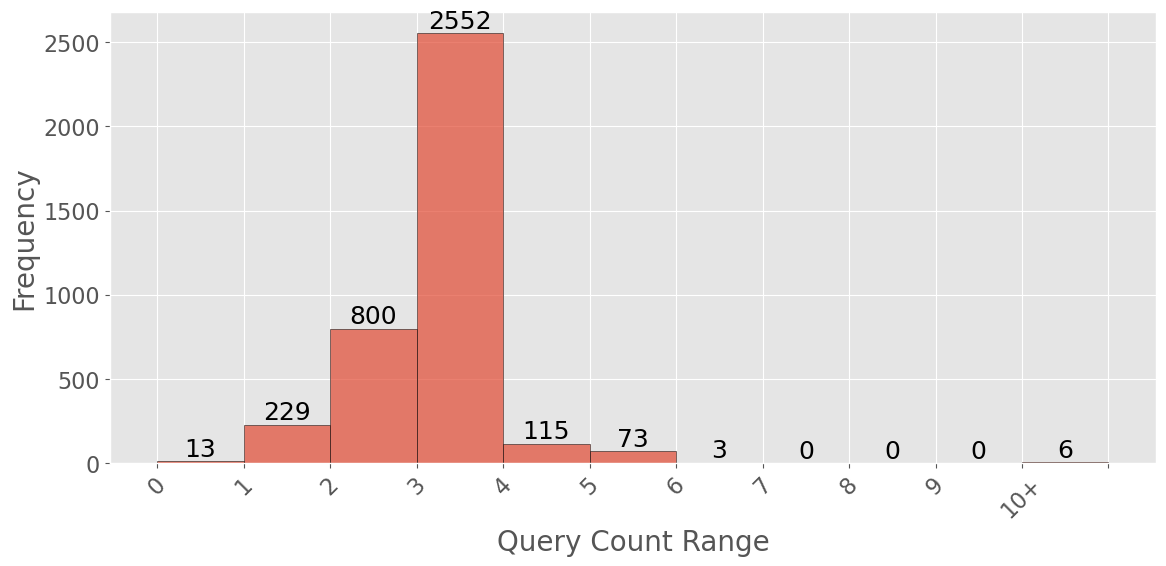

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# 准备数据
values = []
for count, freq in data.items():
    if not np.isinf(count) and not np.isnan(count) and count >= 0:  # 过滤无效值和负值
        if count > 10:
            count = 10
        values.extend([count] * freq)

# 设置分组边界 - 每10个单位一个区间
bin_width = 1

bins = list(range(0, 12, 1))  # 0,10,20,...,100,150
labels = [str(x) for x in bins[:-2]] + ['10+', ' ']

# 绘制直方图
plt.rcParams.update({
    'font.size': 18,          # 全局默认字号
    'axes.titlesize': 16,     # 标题字号
    'axes.labelsize': 20,     # 坐标轴标签字号
    'xtick.labelsize': 16,    # x轴刻度字号
    'ytick.labelsize': 16,    # y轴刻度字号
})

plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(values, bins=bins, edgecolor='black', alpha=0.7)

# 设置x轴标签

plt.xticks(bins, labels, rotation=45)

# 添加标题和标签
# plt.title('Distribution of SPARQL Query Counts', fontsize=16, pad=20)
plt.xlabel('Query Count Range', fontsize=20)
plt.ylabel('Frequency', fontsize=20)

# 在每个柱子上方添加频数标签
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width()/2, 
             patches[i].get_height(), 
             f'{int(n[i])}', 
             ha='center', va='bottom')

# 调整布局
plt.tight_layout()
plt.show()

In [86]:
sum(data)/len(data)

30.31578947368421

In [ ]:
import json

data = json.load(open('data/wikidata_mid_to_fn.json', 'r'))

In [ ]:
with open('../SPICE_code/dataset/ner/allennlp_ner/wikidata_entities.json', 'w') as f:
    _id = 0
    for id, label in data.items():
        f.write(f'{{"index":{{"_id":"{_id}"}}}}\n')
        f.write(json.dumps({"id":id,"label":label}) + '\n')
        _id += 1